<a href="https://colab.research.google.com/github/Knerdy-got-moves/Nanodiamond-band-structure-and-CV/blob/main/Nanodiamond_TB_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nanodiamond TB hamiltonian

The lattice of a diamond is the interpenetrating fcc given by:

Diamond FCC Lattice Visualization
Diamond Structure Analysis
Lattice constant: 3.567 Å
Number of atoms in sublattice A: 108
Number of atoms in sublattice B: 108
Total number of atoms: 216
Number of bonds: 333
Average bond length: 1.545 Å
Theoretical bond length: 1.545 Å
Average coordination number: 3.1
Expected coordination number: 4 (tetrahedral)

Plotting unit cell...


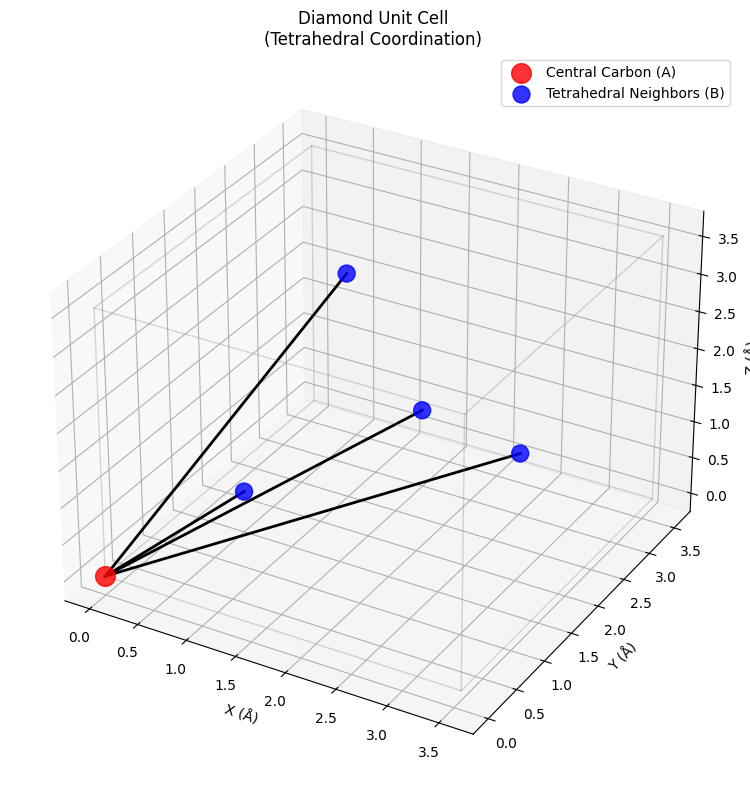

Plotting diamond structure with matplotlib...


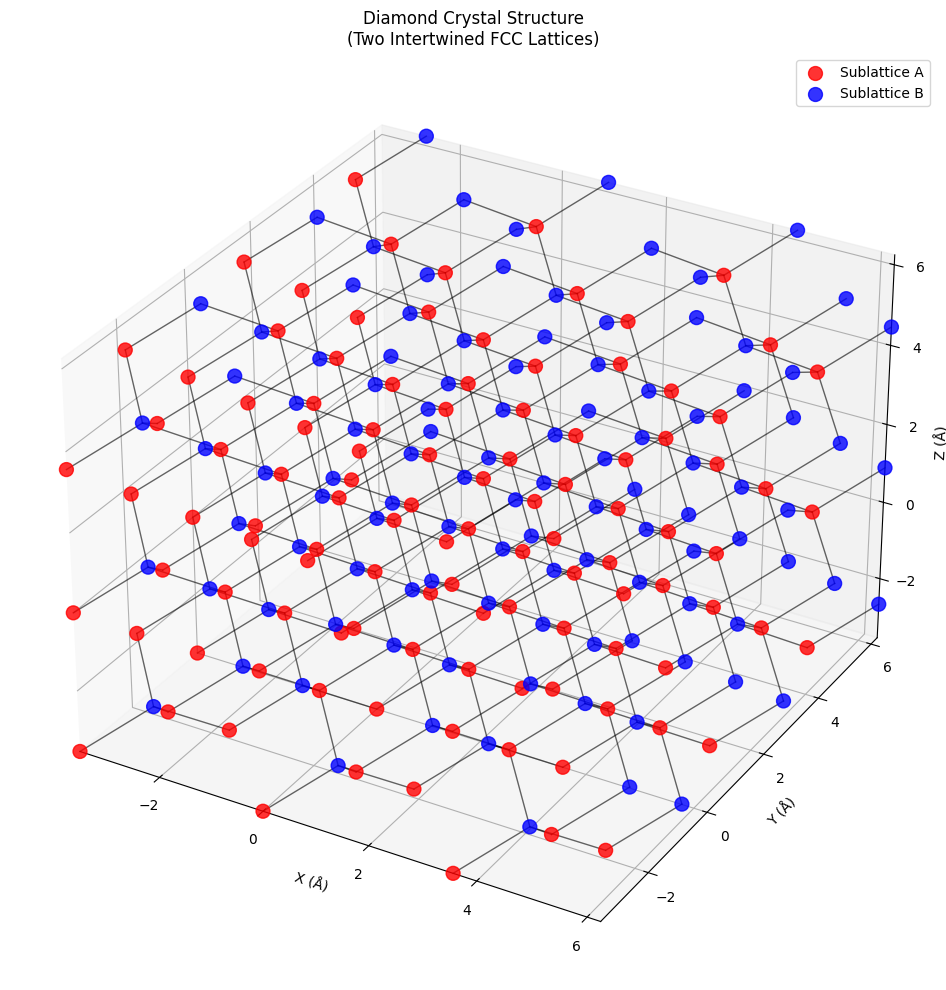

Creating interactive plotly visualization...



Creating specialized views...


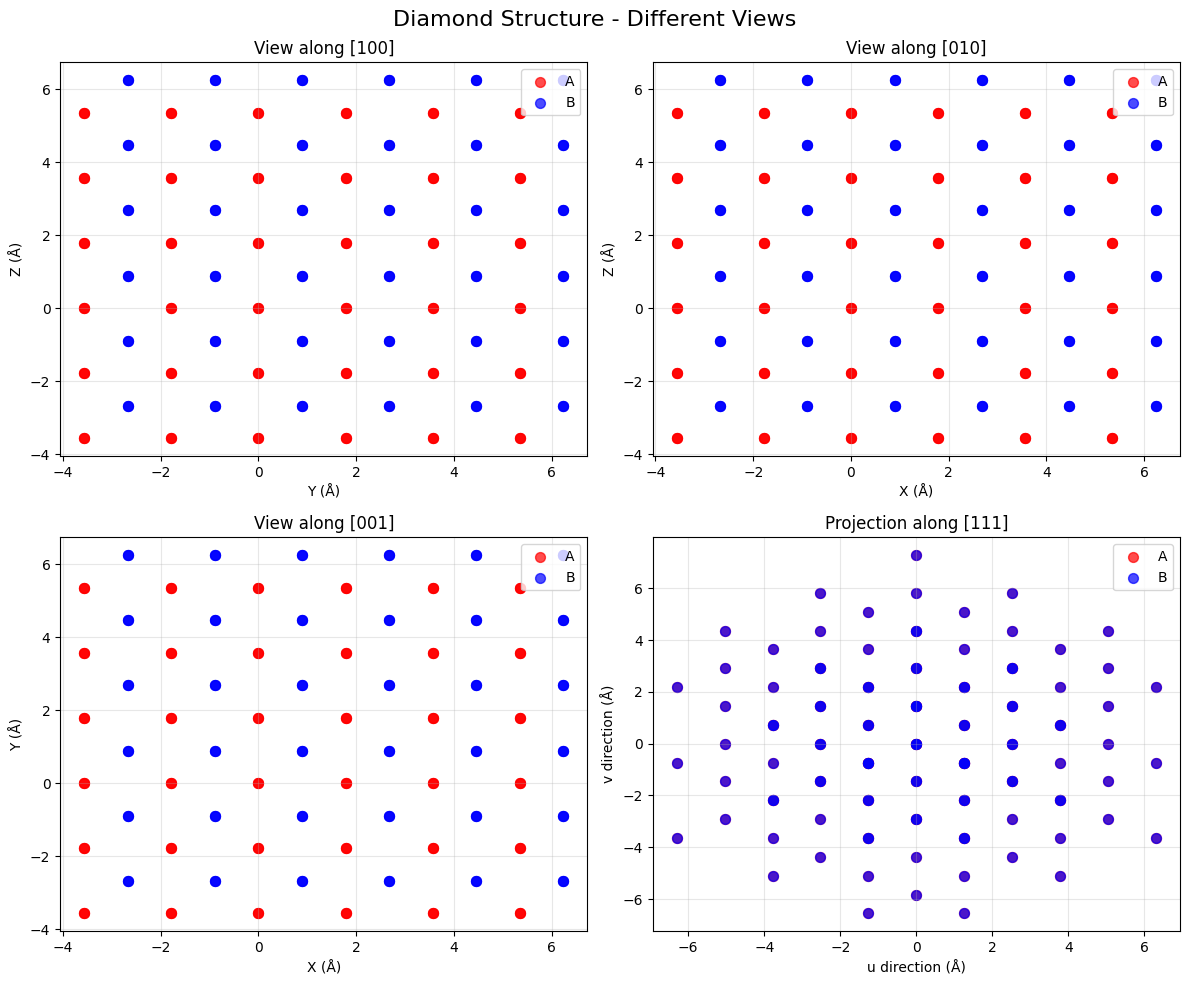


Diamond lattice visualization complete!
Key features:
- Red atoms: Sublattice A (FCC)
- Blue atoms: Sublattice B (FCC offset by a/4[111])
- Black lines: Covalent bonds
- Each atom has 4 tetrahedral neighbors


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

class DiamondLattice:
    def __init__(self, lattice_constant=3.567):
        """
        Initialize diamond lattice structure
        lattice_constant: in Angstroms (default is for diamond)
        """
        self.a = lattice_constant

        # FCC lattice vectors
        self.lattice_vectors = np.array([
            [0.5, 0.5, 0.0],
            [0.5, 0.0, 0.5],
            [0.0, 0.5, 0.5]
        ]) * self.a

        # Two sublattices (A and B) forming the diamond structure
        # Sublattice A at (0,0,0)
        # Sublattice B at (a/4, a/4, a/4)
        self.sublattice_offset = np.array([0.25, 0.25, 0.25]) * self.a

    def generate_fcc_positions(self, n_cells=3):
        """Generate FCC lattice positions"""
        positions = []

        # Generate positions for n_cells x n_cells x n_cells unit cells
        for i in range(-n_cells//2, n_cells//2 + 1):
            for j in range(-n_cells//2, n_cells//2 + 1):
                for k in range(-n_cells//2, n_cells//2 + 1):
                    # Base position
                    base = np.array([i, j, k]) * self.a

                    # Add FCC basis positions
                    fcc_basis = np.array([
                        [0.0, 0.0, 0.0],
                        [0.5, 0.5, 0.0],
                        [0.5, 0.0, 0.5],
                        [0.0, 0.5, 0.5]
                    ]) * self.a

                    for basis_pos in fcc_basis:
                        positions.append(base + basis_pos)

        return np.array(positions)

    def generate_diamond_structure(self, n_cells=3):
        """Generate complete diamond structure with two intertwined FCC lattices"""
        # Generate first FCC sublattice (A)
        fcc_A = self.generate_fcc_positions(n_cells)

        # Generate second FCC sublattice (B) - offset by (a/4, a/4, a/4)
        fcc_B = self.generate_fcc_positions(n_cells) + self.sublattice_offset

        return fcc_A, fcc_B

    def get_nearest_neighbors(self, position, all_positions, max_distance=None):
        """Find nearest neighbors for a given position"""
        if max_distance is None:
            max_distance = self.a * np.sqrt(3) / 4 * 1.1  # Slightly larger than nearest neighbor distance

        distances = np.linalg.norm(all_positions - position, axis=1)
        neighbors = all_positions[distances < max_distance]
        neighbors = neighbors[distances[distances < max_distance] > 0.01]  # Exclude self

        return neighbors

    def generate_bonds(self, fcc_A, fcc_B, max_bond_length=None):
        """Generate bonds between atoms"""
        if max_bond_length is None:
            max_bond_length = self.a * np.sqrt(3) / 4 * 1.1

        bonds = []
        all_positions = np.vstack([fcc_A, fcc_B])

        # Check bonds between A and B sublattices
        for pos_A in fcc_A:
            for pos_B in fcc_B:
                distance = np.linalg.norm(pos_A - pos_B)
                if distance < max_bond_length:
                    bonds.append([pos_A, pos_B])

        return bonds

    def plot_matplotlib(self, n_cells=2, show_bonds=True, figsize=(12, 10)):
        """Plot diamond lattice using matplotlib"""
        fcc_A, fcc_B = self.generate_diamond_structure(n_cells)

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')

        # Plot sublattice A (carbon atoms)
        ax.scatter(fcc_A[:, 0], fcc_A[:, 1], fcc_A[:, 2],
                  c='red', s=100, alpha=0.8, label='Sublattice A')

        # Plot sublattice B (carbon atoms)
        ax.scatter(fcc_B[:, 0], fcc_B[:, 1], fcc_B[:, 2],
                  c='blue', s=100, alpha=0.8, label='Sublattice B')

        # Plot bonds
        if show_bonds:
            bonds = self.generate_bonds(fcc_A, fcc_B)
            for bond in bonds:
                ax.plot3D(*zip(*bond), 'k-', alpha=0.6, linewidth=1)

        # Formatting
        ax.set_xlabel('X (Å)')
        ax.set_ylabel('Y (Å)')
        ax.set_zlabel('Z (Å)')
        ax.set_title('Diamond Crystal Structure\n(Two Intertwined FCC Lattices)')
        ax.legend()

        # Equal aspect ratio
        max_range = np.array([fcc_A.max(), fcc_B.max()]).max()
        min_range = np.array([fcc_A.min(), fcc_B.min()]).min()
        ax.set_xlim([min_range, max_range])
        ax.set_ylim([min_range, max_range])
        ax.set_zlim([min_range, max_range])

        plt.tight_layout()
        plt.show()

        return fig, ax

    def plot_plotly(self, n_cells=2, show_bonds=True):
        """Plot diamond lattice using plotly for interactive visualization"""
        fcc_A, fcc_B = self.generate_diamond_structure(n_cells)

        fig = go.Figure()

        # Add sublattice A
        fig.add_trace(go.Scatter3d(
            x=fcc_A[:, 0], y=fcc_A[:, 1], z=fcc_A[:, 2],
            mode='markers',
            marker=dict(size=8, color='red', opacity=0.8),
            name='Sublattice A'
        ))

        # Add sublattice B
        fig.add_trace(go.Scatter3d(
            x=fcc_B[:, 0], y=fcc_B[:, 1], z=fcc_B[:, 2],
            mode='markers',
            marker=dict(size=8, color='blue', opacity=0.8),
            name='Sublattice B'
        ))

        # Add bonds
        if show_bonds:
            bonds = self.generate_bonds(fcc_A, fcc_B)
            for bond in bonds:
                fig.add_trace(go.Scatter3d(
                    x=[bond[0][0], bond[1][0]],
                    y=[bond[0][1], bond[1][1]],
                    z=[bond[0][2], bond[1][2]],
                    mode='lines',
                    line=dict(color='black', width=2),
                    showlegend=False,
                    hoverinfo='skip'
                ))

        # Update layout
        fig.update_layout(
            title='Diamond Crystal Structure (Two Intertwined FCC Lattices)',
            scene=dict(
                xaxis_title='X (Å)',
                yaxis_title='Y (Å)',
                zaxis_title='Z (Å)',
                aspectmode='cube'
            ),
            width=800,
            height=600
        )

        fig.show()
        return fig

    def plot_unit_cell(self):
        """Plot a single unit cell to show the tetrahedral coordination"""
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Unit cell positions
        unit_cell_A = np.array([[0, 0, 0]]) * self.a
        unit_cell_B = np.array([
            [0.25, 0.25, 0.25],
            [0.75, 0.75, 0.25],
            [0.75, 0.25, 0.75],
            [0.25, 0.75, 0.75]
        ]) * self.a

        # Plot atoms
        ax.scatter(unit_cell_A[:, 0], unit_cell_A[:, 1], unit_cell_A[:, 2],
                  c='red', s=200, alpha=0.8, label='Central Carbon (A)')
        ax.scatter(unit_cell_B[:, 0], unit_cell_B[:, 1], unit_cell_B[:, 2],
                  c='blue', s=150, alpha=0.8, label='Tetrahedral Neighbors (B)')

        # Plot bonds
        for pos_B in unit_cell_B:
            ax.plot3D(*zip(unit_cell_A[0], pos_B), 'k-', linewidth=2)

        # Plot unit cell edges
        cube_edges = [
            [[0, 0, 0], [self.a, 0, 0]],
            [[0, 0, 0], [0, self.a, 0]],
            [[0, 0, 0], [0, 0, self.a]],
            [[self.a, 0, 0], [self.a, self.a, 0]],
            [[self.a, 0, 0], [self.a, 0, self.a]],
            [[0, self.a, 0], [self.a, self.a, 0]],
            [[0, self.a, 0], [0, self.a, self.a]],
            [[0, 0, self.a], [self.a, 0, self.a]],
            [[0, 0, self.a], [0, self.a, self.a]],
            [[self.a, self.a, 0], [self.a, self.a, self.a]],
            [[self.a, 0, self.a], [self.a, self.a, self.a]],
            [[0, self.a, self.a], [self.a, self.a, self.a]]
        ]

        for edge in cube_edges:
            ax.plot3D(*zip(*edge), 'gray', alpha=0.3, linewidth=1)

        ax.set_xlabel('X (Å)')
        ax.set_ylabel('Y (Å)')
        ax.set_zlabel('Z (Å)')
        ax.set_title('Diamond Unit Cell\n(Tetrahedral Coordination)')
        ax.legend()

        plt.tight_layout()
        plt.show()

        return fig, ax

    def analyze_structure(self, n_cells=2):
        """Analyze the diamond structure properties"""
        fcc_A, fcc_B = self.generate_diamond_structure(n_cells)
        bonds = self.generate_bonds(fcc_A, fcc_B)

        print("Diamond Structure Analysis")
        print("=" * 40)
        print(f"Lattice constant: {self.a:.3f} Å")
        print(f"Number of atoms in sublattice A: {len(fcc_A)}")
        print(f"Number of atoms in sublattice B: {len(fcc_B)}")
        print(f"Total number of atoms: {len(fcc_A) + len(fcc_B)}")
        print(f"Number of bonds: {len(bonds)}")

        # Calculate bond lengths
        bond_lengths = [np.linalg.norm(bond[0] - bond[1]) for bond in bonds]
        avg_bond_length = np.mean(bond_lengths)

        print(f"Average bond length: {avg_bond_length:.3f} Å")
        print(f"Theoretical bond length: {self.a * np.sqrt(3) / 4:.3f} Å")

        # Calculate coordination number
        all_positions = np.vstack([fcc_A, fcc_B])
        coordination_numbers = []

        for pos in all_positions:
            neighbors = self.get_nearest_neighbors(pos, all_positions)
            coordination_numbers.append(len(neighbors))

        avg_coordination = np.mean(coordination_numbers)
        print(f"Average coordination number: {avg_coordination:.1f}")
        print(f"Expected coordination number: 4 (tetrahedral)")

        return {
            'n_atoms_A': len(fcc_A),
            'n_atoms_B': len(fcc_B),
            'n_bonds': len(bonds),
            'avg_bond_length': avg_bond_length,
            'avg_coordination': avg_coordination
        }

def main():
    """Main function to demonstrate diamond lattice visualization"""
    print("Diamond FCC Lattice Visualization")
    print("=" * 40)

    # Create diamond lattice
    diamond = DiamondLattice()

    # Analyze structure
    analysis = diamond.analyze_structure(n_cells=2)

    # Plot unit cell
    print("\nPlotting unit cell...")
    diamond.plot_unit_cell()

    # Plot full structure with matplotlib
    print("Plotting diamond structure with matplotlib...")
    diamond.plot_matplotlib(n_cells=2, show_bonds=True)

    # Plot with plotly (interactive)
    print("Creating interactive plotly visualization...")
    try:
        diamond.plot_plotly(n_cells=2, show_bonds=True)
    except ImportError:
        print("Plotly not available. Install with: pip install plotly")

    # Additional visualizations
    print("\nCreating specialized views...")

    # View along different crystallographic directions
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Diamond Structure - Different Views', fontsize=16)

    fcc_A, fcc_B = diamond.generate_diamond_structure(n_cells=2)

    # [100] direction
    ax = axes[0, 0]
    ax.scatter(fcc_A[:, 1], fcc_A[:, 2], c='red', s=50, alpha=0.7, label='A')
    ax.scatter(fcc_B[:, 1], fcc_B[:, 2], c='blue', s=50, alpha=0.7, label='B')
    ax.set_xlabel('Y (Å)')
    ax.set_ylabel('Z (Å)')
    ax.set_title('View along [100]')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # [010] direction
    ax = axes[0, 1]
    ax.scatter(fcc_A[:, 0], fcc_A[:, 2], c='red', s=50, alpha=0.7, label='A')
    ax.scatter(fcc_B[:, 0], fcc_B[:, 2], c='blue', s=50, alpha=0.7, label='B')
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Z (Å)')
    ax.set_title('View along [010]')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # [001] direction
    ax = axes[1, 0]
    ax.scatter(fcc_A[:, 0], fcc_A[:, 1], c='red', s=50, alpha=0.7, label='A')
    ax.scatter(fcc_B[:, 0], fcc_B[:, 1], c='blue', s=50, alpha=0.7, label='B')
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_title('View along [001]')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # [111] projection
    ax = axes[1, 1]
    # Project onto plane perpendicular to [111]
    normal = np.array([1, 1, 1]) / np.sqrt(3)
    u = np.array([1, -1, 0]) / np.sqrt(2)
    v = np.array([1, 1, -2]) / np.sqrt(6)

    proj_A = np.array([np.dot(pos, u) for pos in fcc_A]), np.array([np.dot(pos, v) for pos in fcc_A])
    proj_B = np.array([np.dot(pos, u) for pos in fcc_B]), np.array([np.dot(pos, v) for pos in fcc_B])

    ax.scatter(proj_A[0], proj_A[1], c='red', s=50, alpha=0.7, label='A')
    ax.scatter(proj_B[0], proj_B[1], c='blue', s=50, alpha=0.7, label='B')
    ax.set_xlabel('u direction (Å)')
    ax.set_ylabel('v direction (Å)')
    ax.set_title('Projection along [111]')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\nDiamond lattice visualization complete!")
    print("Key features:")
    print("- Red atoms: Sublattice A (FCC)")
    print("- Blue atoms: Sublattice B (FCC offset by a/4[111])")
    print("- Black lines: Covalent bonds")
    print("- Each atom has 4 tetrahedral neighbors")

if __name__ == "__main__":
    main()

Energy spectrum and effecctive mass is given by

Calculating and plotting band structure...


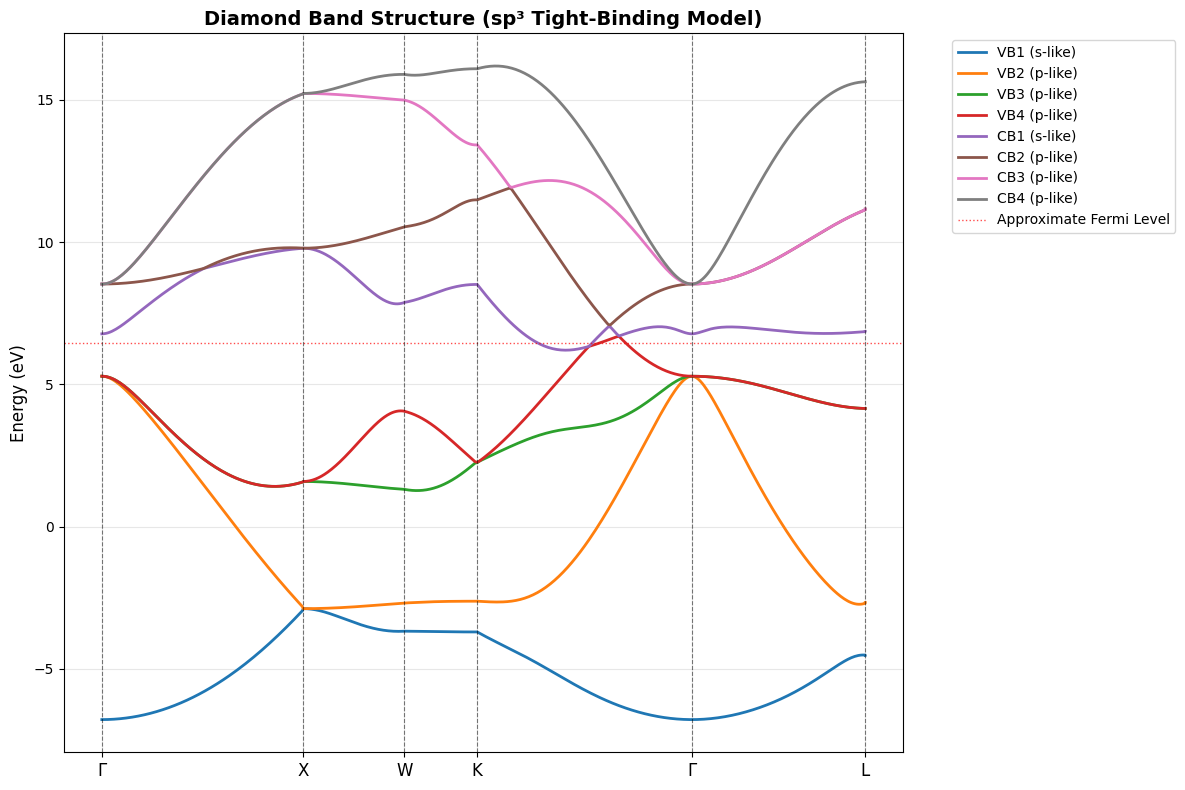

Analysis of High-Symmetry Points in Diamond

Γ point: k = (0.000, 0.000, 0.000)
----------------------------------------
Band energies (eV):
  Band 1:   -6.780 eV  (VB1 (s-like))
  Band 2:    5.290 eV  (VB2 (p-like))
  Band 3:    5.290 eV  (VB3 (p-like))
  Band 4:    5.290 eV  (VB4 (p-like))
  Band 5:    6.780 eV  (CB1 (s-like))
  Band 6:    8.530 eV  (CB2 (p-like))
  Band 7:    8.530 eV  (CB3 (p-like))
  Band 8:    8.530 eV  (CB4 (p-like))

Band gap analysis:
  VBM: Band 2, E = 5.290 eV
  CBM: Band 5, E = 6.780 eV
  Band gap: 1.490 eV

Effective masses at Γ:
  VBM (Band 2):
    m*_xx =   -0.265 m_e
    m*_yy =   -0.265 m_e
    m*_zz =   -0.265 m_e
    Average:   -0.265 m_e
  CBM (Band 5):
    m*_xx =    0.308 m_e
    m*_yy =    0.308 m_e
    m*_zz =    0.308 m_e
    Average:    0.308 m_e

X point: k = (1.000, 0.000, 0.000)
----------------------------------------
Band energies (eV):
  Band 1:   -2.880 eV  (VB1 (s-like))
  Band 2:   -2.880 eV  (VB2 (p-like))
  Band 3:    1.590 eV  (VB3

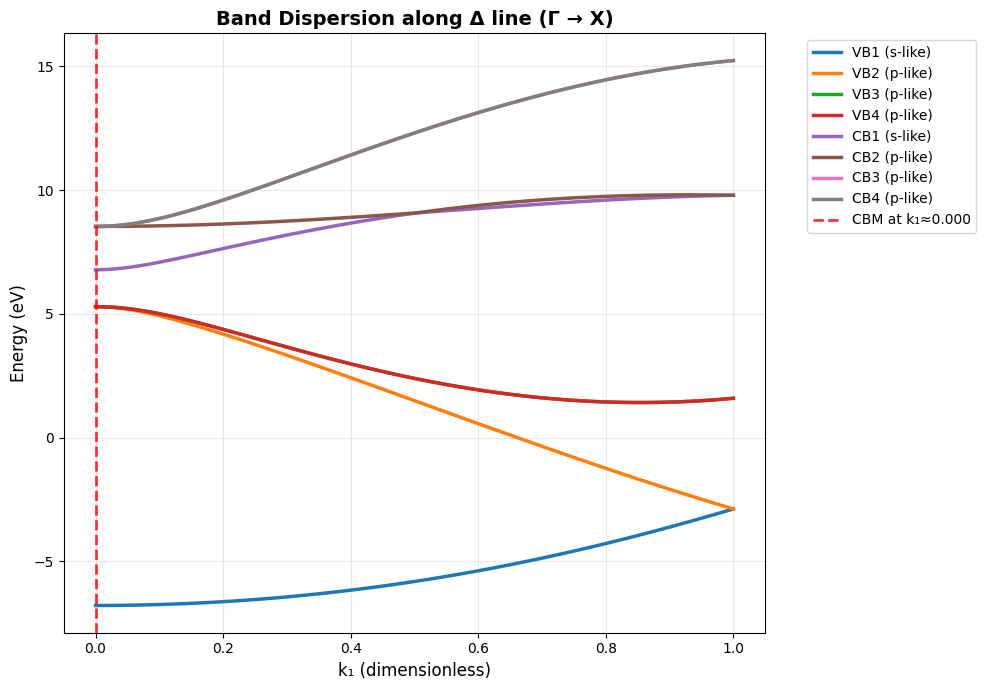

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import warnings
warnings.filterwarnings('ignore')

class DiamondBandStructure:
    """
    Calculate the band structure of diamond using the sp3 tight-binding model
    with Chadi-Cohen parameters.
    """

    def __init__(self):
        # Chadi-Cohen parameters for carbon (eV)
        self.E_s = 0.0          # Reference energy
        self.E_p = 8.41         # p orbital energy
        self.V_ss = -6.78       # s-s hopping
        self.V_sp = 5.31        # s-p hopping
        self.V_xx = 1.62        # p-p sigma hopping
        self.V_xy = 6.82        # p-p pi hopping
        self.U_xx = -1.5         # Second NN (set it to 0 for Chadi-Cohen)

        # High-symmetry points in dimensionless coordinates
        self.sym_points = {
            'Γ': np.array([0.0, 0.0, 0.0]),
            'X': np.array([1.0, 0.0, 0.0]),
            'W': np.array([1.0, 0.5, 0.0]),
            'K': np.array([0.75, 0.75, 0.0]),
            'L': np.array([0.5, 0.5, 0.5])
        }

        # Define colors for different bands
        self.band_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                           '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

        # Band labels for clarity
        self.band_labels = ['VB1 (s-like)', 'VB2 (p-like)', 'VB3 (p-like)', 'VB4 (p-like)',
                           'CB1 (s-like)', 'CB2 (p-like)', 'CB3 (p-like)', 'CB4 (p-like)']

    def g_functions(self, k):
        """
        Calculate the structure factors g_0, g_1, g_2, g_3

        Args:
            k: k-point in dimensionless coordinates [k1, k2, k3]

        Returns:
            tuple: (g0, g1, g2, g3) as complex numbers
        """
        k1, k2, k3 = k

        # Calculate trigonometric functions
        c1, c2, c3 = np.cos(np.pi * k1 / 2), np.cos(np.pi * k2 / 2), np.cos(np.pi * k3 / 2)
        s1, s2, s3 = np.sin(np.pi * k1 / 2), np.sin(np.pi * k2 / 2), np.sin(np.pi * k3 / 2)

        # Structure factors
        g0 = c1 * c2 * c3 - 1j * s1 * s2 * s3
        g1 = c1 * s2 * s3 + 1j * s1 * c2 * c3
        g2 = s1 * c2 * s3 + 1j * c1 * s2 * c3
        g3 = s1 * s2 * c3 + 1j * c1 * c2 * s3

        return g0, g1, g2, g3

    def delta_p(self, k):
        """
        Calculate second-nearest neighbor corrections for p orbitals

        Args:
            k: k-point in dimensionless coordinates [k1, k2, k3]

        Returns:
            tuple: (Δp_x, Δp_y, Δp_z)
        """
        k1, k2, k3 = k

        delta_px = self.U_xx * np.cos(np.pi * k2 / 2) * np.cos(np.pi * k3 / 2)
        delta_py = self.U_xx * np.cos(np.pi * k1 / 2) * np.cos(np.pi * k3 / 2)
        delta_pz = self.U_xx * np.cos(np.pi * k1 / 2) * np.cos(np.pi * k2 / 2)

        return delta_px, delta_py, delta_pz

    def hamiltonian_matrix(self, k):
        """
        Construct the 8x8 tight-binding Hamiltonian matrix

        Args:
            k: k-point in dimensionless coordinates [k1, k2, k3]

        Returns:
            numpy.ndarray: 8x8 Hamiltonian matrix
        """
        # Get structure factors and second NN corrections
        g0, g1, g2, g3 = self.g_functions(k)
        delta_px, delta_py, delta_pz = self.delta_p(k)

        # Initialize 8x8 Hamiltonian matrix
        H = np.zeros((8, 8), dtype=complex)

        # Diagonal blocks H_00 and H_11
        # Sublattice 0 (atoms 0)
        H[0, 0] = self.E_s                    # s_0
        H[1, 1] = self.E_p + delta_px         # p_x0
        H[2, 2] = self.E_p + delta_py         # p_y0
        H[3, 3] = self.E_p + delta_pz         # p_z0

        # Sublattice 1 (atoms 1)
        H[4, 4] = self.E_s                    # s_1
        H[5, 5] = self.E_p + delta_px         # p_x1
        H[6, 6] = self.E_p + delta_py         # p_y1
        H[7, 7] = self.E_p + delta_pz         # p_z1

        # Off-diagonal blocks H_01 and H_10
        # H_01 (sublattice 0 to sublattice 1)
        H[0, 4] = self.V_ss * g0              # s_0 - s_1
        H[0, 5] = self.V_sp * g1              # s_0 - p_x1
        H[0, 6] = self.V_sp * g2              # s_0 - p_y1
        H[0, 7] = self.V_sp * g3              # s_0 - p_z1

        H[1, 4] = self.V_sp * np.conj(g1)     # p_x0 - s_1
        H[1, 5] = self.V_xx * g0              # p_x0 - p_x1
        H[1, 6] = self.V_xy * g3              # p_x0 - p_y1
        H[1, 7] = self.V_xy * g2              # p_x0 - p_z1

        H[2, 4] = self.V_sp * np.conj(g2)     # p_y0 - s_1
        H[2, 5] = self.V_xy * g3              # p_y0 - p_x1
        H[2, 6] = self.V_xx * g0              # p_y0 - p_y1
        H[2, 7] = self.V_xy * g1              # p_y0 - p_z1

        H[3, 4] = self.V_sp * np.conj(g3)     # p_z0 - s_1
        H[3, 5] = self.V_xy * g2              # p_z0 - p_x1
        H[3, 6] = self.V_xy * g1              # p_z0 - p_y1
        H[3, 7] = self.V_xx * g0              # p_z0 - p_z1

        # H_10 = H_01^dagger
        H[4:8, 0:4] = np.conj(H[0:4, 4:8].T)

        return H

    def calculate_bands(self, k_points):
        """
        Calculate eigenvalues (band energies) for given k-points

        Args:
            k_points: array of k-points in dimensionless coordinates

        Returns:
            numpy.ndarray: eigenvalues for each k-point (n_kpts x 8)
        """
        eigenvalues = []

        for k in k_points:
            H = self.hamiltonian_matrix(k)
            eigvals = eigh(H, eigvals_only=True)
            eigenvalues.append(np.real(eigvals))

        return np.array(eigenvalues)

    def calculate_effective_mass_improved(self, k_point, band_index, delta=1e-3):
        """
        Improved effective mass calculation with better numerical stability

        Args:
            k_point: k-point in dimensionless coordinates
            band_index: index of the band (0-7)
            delta: step size for numerical differentiation

        Returns:
            dict: Contains diagonal effective masses and full tensor
        """
        # Convert k_point to numpy array if it isn't already
        k_point = np.array(k_point)

        # Initialize results
        mass_tensor = np.zeros((3, 3))
        diagonal_masses = np.zeros(3)

        # Calculate diagonal terms of the effective mass tensor
        for i in range(3):
            # Create displacement vectors
            dk = np.zeros(3)
            dk[i] = delta

            # Calculate energies at displaced points
            k_plus = k_point + dk
            k_minus = k_point - dk

            # Get eigenvalues
            E_plus = self.calculate_bands([k_plus])[0][band_index]
            E_minus = self.calculate_bands([k_minus])[0][band_index]
            E_center = self.calculate_bands([k_point])[0][band_index]

            # Calculate second derivative using finite differences
            d2E_dk2 = (E_plus - 2*E_center + E_minus) / (delta**2)

            # Convert to effective mass (in units of electron mass)
            # Using the relation: m* = ħ²/(d²E/dk²) with proper unit conversion
            # For dimensionless k coordinates: m*/m_e = (2π/a)² * ħ²/(m_e * d²E/dk²)

            if abs(d2E_dk2) > 1e-10:  # Avoid division by very small numbers
                # Constants for unit conversion
                hbar_eV_s = 6.582119569e-16  # ħ in eV⋅s
                m_e_eV = 0.51099895000e6     # electron mass in eV/c²
                a_diamond = 3.567e-10        # diamond lattice constant in m
                c = 2.99792458e8             # speed of light in m/s

                # Conversion factor: (ħc)²/(m_e c² a²) * (2π)²
                # This gives effective mass in units of m_e
                conversion = (hbar_eV_s * c)**2 / (m_e_eV * (a_diamond)**2) * (2*np.pi)**2

                diagonal_masses[i] = conversion / d2E_dk2
                mass_tensor[i, i] = diagonal_masses[i]
            else:
                diagonal_masses[i] = np.inf
                mass_tensor[i, i] = np.inf

        # Calculate off-diagonal terms for completeness
        for i in range(3):
            for j in range(i+1, 3):
                dk_i = np.zeros(3)
                dk_j = np.zeros(3)
                dk_i[i] = delta
                dk_j[j] = delta

                # Four-point formula for mixed derivatives
                k_pp = k_point + dk_i + dk_j
                k_pm = k_point + dk_i - dk_j
                k_mp = k_point - dk_i + dk_j
                k_mm = k_point - dk_i - dk_j

                E_pp = self.calculate_bands([k_pp])[0][band_index]
                E_pm = self.calculate_bands([k_pm])[0][band_index]
                E_mp = self.calculate_bands([k_mp])[0][band_index]
                E_mm = self.calculate_bands([k_mm])[0][band_index]

                d2E_dkidkj = (E_pp - E_pm - E_mp + E_mm) / (4 * delta**2)

                if abs(d2E_dkidkj) > 1e-10:
                    hbar_eV_s = 6.582119569e-16
                    m_e_eV = 0.51099895000e6
                    a_diamond = 3.567e-10
                    c = 2.99792458e8
                    conversion = (hbar_eV_s * c)**2 / (m_e_eV * (a_diamond)**2) * (2*np.pi)**2

                    mass_tensor[i, j] = conversion / d2E_dkidkj
                    mass_tensor[j, i] = mass_tensor[i, j]  # Symmetric
                else:
                    mass_tensor[i, j] = 0
                    mass_tensor[j, i] = 0

        return {
            'diagonal': diagonal_masses,
            'tensor': mass_tensor,
            'isotropic_average': np.mean(diagonal_masses[np.isfinite(diagonal_masses)])
        }

    def plot_band_structure_path(self, path_points, labels, n_points=100):
        """
        Plot band structure along a high-symmetry path with color coding

        Args:
            path_points: list of k-points defining the path
            labels: list of labels for the high-symmetry points
            n_points: number of points between each pair of high-symmetry points
        """
        # Generate k-points along the path
        k_path = []
        k_distances = [0]

        for i in range(len(path_points) - 1):
            start = np.array(path_points[i])
            end = np.array(path_points[i + 1])

            # Linear interpolation between points
            segment = np.linspace(start, end, n_points, endpoint=False)
            k_path.extend(segment)

            # Calculate cumulative distance
            segment_length = np.linalg.norm(end - start)
            for j in range(n_points):
                if i > 0 or j > 0:  # Don't double-count the first point
                    k_distances.append(k_distances[-1] + segment_length / n_points)

        # Add the final point
        k_path.append(path_points[-1])
        k_distances.append(k_distances[-1])

        # Calculate band energies
        eigenvalues = self.calculate_bands(k_path)

        # Create the plot with color coding
        plt.figure(figsize=(12, 8))

        # Plot each band with different colors and labels
        for band in range(8):
            plt.plot(k_distances, eigenvalues[:, band],
                    color=self.band_colors[band],
                    linewidth=2.0,
                    label=self.band_labels[band])

        # Add horizontal line at Fermi level (around the gap)
        fermi_level = np.mean([np.max(eigenvalues[:, 3]), np.min(eigenvalues[:, 4])])
        plt.axhline(y=fermi_level, color='red', linestyle=':', alpha=0.7,
                   linewidth=1, label='Approximate Fermi Level')

        # Add vertical lines at high-symmetry points
        sym_distances = [k_distances[i * n_points] for i in range(len(path_points))]
        for dist in sym_distances:
            plt.axvline(x=dist, color='k', linestyle='--', alpha=0.5, linewidth=0.8)

        # Set labels and formatting
        plt.xticks(sym_distances, labels, fontsize=12)
        plt.ylabel('Energy (eV)', fontsize=12)
        plt.title('Diamond Band Structure (sp³ Tight-Binding Model)', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.tight_layout()

        return k_path, eigenvalues

    def analyze_symmetry_points(self):
        """
        Analyze band energies and effective masses at high-symmetry points
        """
        print("Analysis of High-Symmetry Points in Diamond")
        print("=" * 60)

        for label, k_point in self.sym_points.items():
            print(f"\n{label} point: k = ({k_point[0]:.3f}, {k_point[1]:.3f}, {k_point[2]:.3f})")
            print("-" * 40)

            # Calculate eigenvalues
            eigenvalues = self.calculate_bands([k_point])[0]

            print(f"Band energies (eV):")
            for i, E in enumerate(eigenvalues):
                print(f"  Band {i+1}: {E:8.3f} eV  ({self.band_labels[i]})")

            # Identify valence and conduction bands
            # Find the gap
            sorted_energies = np.sort(eigenvalues)
            gap_position = 4  # Between 4th and 5th bands typically

            vbm_energy = sorted_energies[3]  # 4th band (highest valence)
            cbm_energy = sorted_energies[4]  # 5th band (lowest conduction)
            band_gap = cbm_energy - vbm_energy

            vbm_index = np.where(eigenvalues == vbm_energy)[0][0]
            cbm_index = np.where(eigenvalues == cbm_energy)[0][0]

            print(f"\nBand gap analysis:")
            print(f"  VBM: Band {vbm_index+1}, E = {vbm_energy:.3f} eV")
            print(f"  CBM: Band {cbm_index+1}, E = {cbm_energy:.3f} eV")
            print(f"  Band gap: {band_gap:.3f} eV")

            # Calculate effective masses for key bands
            print(f"\nEffective masses at {label}:")

            # Calculate for VBM and CBM
            for band_type, band_idx in [("VBM", vbm_index), ("CBM", cbm_index)]:
                try:
                    mass_data = self.calculate_effective_mass_improved(k_point, band_idx)
                    diag_masses = mass_data['diagonal']

                    print(f"  {band_type} (Band {band_idx+1}):")
                    print(f"    m*_xx = {diag_masses[0]:8.3f} m_e")
                    print(f"    m*_yy = {diag_masses[1]:8.3f} m_e")
                    print(f"    m*_zz = {diag_masses[2]:8.3f} m_e")

                    finite_masses = diag_masses[np.isfinite(diag_masses)]
                    if len(finite_masses) > 0:
                        avg_mass = np.mean(finite_masses)
                        print(f"    Average: {avg_mass:8.3f} m_e")

                except Exception as e:
                    print(f"  {band_type}: Could not calculate effective mass - {str(e)}")

            # Also try some other bands if we're at special points
            if label in ['X', 'L']:
                print(f"  Additional bands:")
                for band_idx in [2, 5]:  # Some other bands
                    try:
                        mass_data = self.calculate_effective_mass_improved(k_point, band_idx)
                        diag_masses = mass_data['diagonal']
                        finite_masses = diag_masses[np.isfinite(diag_masses)]
                        if len(finite_masses) > 0:
                            avg_mass = np.mean(finite_masses)
                            print(f"    Band {band_idx+1}: {avg_mass:8.3f} m_e (avg)")
                    except:
                        pass


def main():
    """
    Main function to demonstrate the diamond band structure calculation
    """
    # Create the band structure calculator
    diamond = DiamondBandStructure()

    # Define high-symmetry path: Γ → X → W → K → Γ → L
    path_points = [
        diamond.sym_points['Γ'],
        diamond.sym_points['X'],
        diamond.sym_points['W'],
        diamond.sym_points['K'],
        diamond.sym_points['Γ'],
        diamond.sym_points['L']
    ]
    labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L']

    # Plot band structure
    print("Calculating and plotting band structure...")
    k_path, eigenvalues = diamond.plot_band_structure_path(path_points, labels)
    plt.show()

    # Analyze symmetry points
    diamond.analyze_symmetry_points()

    # Additional analysis: Find CBM location along Δ line
    print("\n" + "="*60)
    print("Searching for CBM along Δ line (Γ → X)")
    print("="*60)

    # Generate points along Δ line
    k_delta = np.linspace(0, 1, 101)
    delta_points = [[k, 0, 0] for k in k_delta]
    delta_eigenvalues = diamond.calculate_bands(delta_points)

    # Find minimum of lowest conduction band (band 5, index 4)
    cb_energies = delta_eigenvalues[:, 4]
    cbm_index = np.argmin(cb_energies)
    cbm_k = k_delta[cbm_index]
    cbm_energy = cb_energies[cbm_index]

    print(f"CBM found at k = ({cbm_k:.3f}, 0, 0)")
    print(f"CBM energy: {cbm_energy:.3f} eV")

    # Calculate effective mass at CBM
    try:
        cbm_point = [cbm_k, 0, 0]
        mass_data = diamond.calculate_effective_mass_improved(cbm_point, 4)
        print(f"CBM effective mass along Δ:")
        print(f"  m*_xx = {mass_data['diagonal'][0]:.3f} m_e")
        print(f"  m*_yy = {mass_data['diagonal'][1]:.3f} m_e")
        print(f"  m*_zz = {mass_data['diagonal'][2]:.3f} m_e")
    except Exception as e:
        print(f"Could not calculate CBM effective mass: {e}")

    # Plot Δ line dispersion with colors
    plt.figure(figsize=(10, 7))
    for band in range(8):
        plt.plot(k_delta, delta_eigenvalues[:, band],
                color=diamond.band_colors[band],
                linewidth=2.5,
                label=diamond.band_labels[band])

    plt.axvline(x=cbm_k, color='red', linestyle='--', alpha=0.8,
               linewidth=2, label=f'CBM at k₁≈{cbm_k:.3f}')
    plt.xlabel('k₁ (dimensionless)', fontsize=12)
    plt.ylabel('Energy (eV)', fontsize=12)
    plt.title('Band Dispersion along Δ line (Γ → X)', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()